# אתגר: ניתוח טקסט על מדע הנתונים

> *במחברת זו, אנו מתנסים בשימוש בכתובת URL שונה - מאמר ויקיפדיה על למידת מכונה. ניתן לראות שבניגוד למדע הנתונים, מאמר זה מכיל הרבה מונחים, מה שהופך את הניתוח לבעייתי יותר. עלינו למצוא דרך אחרת לנקות את הנתונים לאחר חילוץ מילות המפתח, כדי להיפטר משילובי מילים תכופים אך חסרי משמעות.*

בדוגמה זו, נעשה תרגיל פשוט שמכסה את כל השלבים בתהליך מסורתי של מדע הנתונים. אין צורך לכתוב קוד, ניתן פשוט ללחוץ על התאים למטה כדי להפעיל אותם ולצפות בתוצאה. כאתגר, מומלץ לנסות את הקוד הזה עם נתונים שונים.

## מטרה

בשיעור זה, דנו במושגים שונים הקשורים למדע הנתונים. בואו ננסה לגלות מושגים נוספים הקשורים לנושא על ידי ביצוע **כריית טקסט**. נתחיל עם טקסט על מדע הנתונים, נחלץ ממנו מילות מפתח, ואז ננסה להמחיש את התוצאה.

כטקסט, אשתמש בדף על מדע הנתונים מוויקיפדיה:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## שלב 1: קבלת הנתונים

השלב הראשון בכל תהליך של מדע הנתונים הוא קבלת הנתונים. נשתמש בספריית `requests` כדי לעשות זאת:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## שלב 2: עיבוד הנתונים

השלב הבא הוא להמיר את הנתונים לצורה המתאימה לעיבוד. במקרה שלנו, הורדנו את קוד המקור של ה-HTML מהדף, ואנו צריכים להמיר אותו לטקסט פשוט.

ישנן דרכים רבות לבצע זאת. אנו נשתמש באובייקט הפשוט ביותר המובנה ב-[HTMLParser](https://docs.python.org/3/library/html.parser.html) של פייתון. עלינו לרשת את המחלקה `HTMLParser` ולהגדיר את הקוד שיאסוף את כל הטקסט שנמצא בתוך תגיות ה-HTML, למעט תגיות `<script>` ו-`<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## שלב 3: קבלת תובנות

השלב החשוב ביותר הוא להפוך את הנתונים שלנו לצורה שממנה נוכל להפיק תובנות. במקרה שלנו, אנחנו רוצים לחלץ מילות מפתח מהטקסט ולראות אילו מילות מפתח הן המשמעותיות ביותר.

נשתמש בספריית Python בשם [RAKE](https://github.com/aneesha/RAKE) לחילוץ מילות מפתח. ראשית, נתקין את הספרייה הזו במקרה שהיא לא מותקנת:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


הפונקציונליות העיקרית זמינה מאובייקט `Rake`, אותו ניתן להתאים אישית באמצעות כמה פרמטרים. במקרה שלנו, נגדיר את האורך המינימלי של מילת מפתח ל-5 תווים, את התדירות המינימלית של מילת מפתח במסמך ל-3, ואת המספר המקסימלי של מילים במילת מפתח - ל-2. אתם מוזמנים להתנסות בערכים אחרים ולצפות בתוצאה.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

השגנו רשימה של מונחים יחד עם דרגת החשיבות המשויכת אליהם. כפי שניתן לראות, התחומים הרלוונטיים ביותר, כמו למידת מכונה וביג דאטה, מופיעים ברשימה במיקומים העליונים.

## שלב 4: ויזואליזציה של התוצאה

אנשים מבינים נתונים בצורה הטובה ביותר כאשר הם מוצגים באופן חזותי. לכן, לעיתים קרובות יש היגיון להציג את הנתונים בצורה ויזואלית כדי להפיק תובנות. ניתן להשתמש בספריית `matplotlib` בפייתון כדי לשרטט התפלגות פשוטה של מילות המפתח עם הרלוונטיות שלהן:


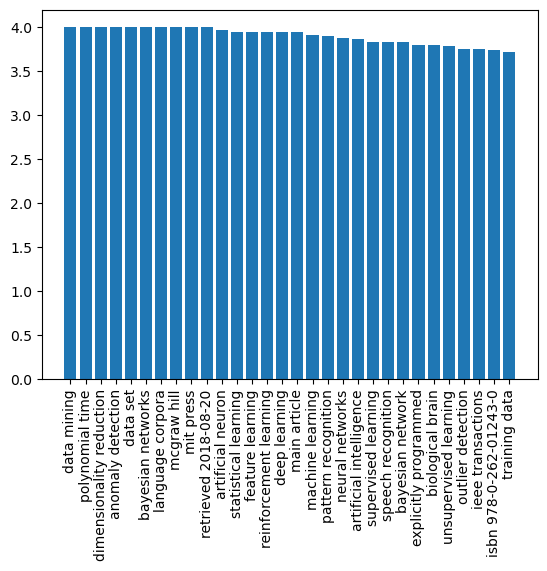

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

יש, עם זאת, דרך אפילו טובה יותר להמחיש תדירות מילים - באמצעות **ענן מילים**. נצטרך להתקין ספרייה נוספת כדי ליצור את ענן המילים מרשימת מילות המפתח שלנו.


In [71]:
!{sys.executable} -m pip install wordcloud

אובייקט `WordCloud` אחראי על קבלת טקסט מקורי או רשימה מחושבת מראש של מילים עם התדירויות שלהן, ומחזיר תמונה שניתן להציג באמצעות `matplotlib`:


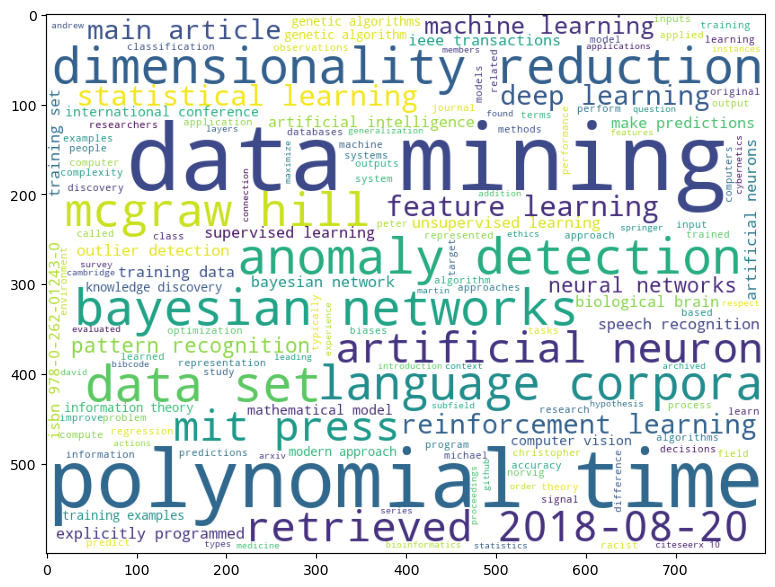

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

אנחנו יכולים גם להעביר את הטקסט המקורי ל-`WordCloud` - בואו נראה אם אנחנו מצליחים לקבל תוצאה דומה:


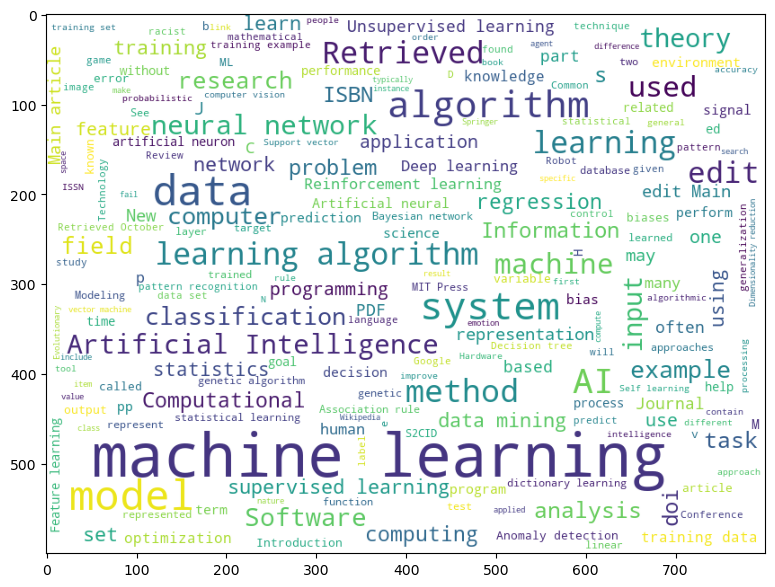

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

ניתן לראות שהענן מילים נראה עכשיו מרשים יותר, אך הוא גם מכיל הרבה רעש (לדוגמה, מילים לא קשורות כמו `Retrieved on`). בנוסף, אנחנו מקבלים פחות מילות מפתח שמורכבות משתי מילים, כמו *data scientist* או *computer science*. הסיבה לכך היא שאלגוריתם RAKE עושה עבודה טובה יותר בבחירת מילות מפתח איכותיות מתוך הטקסט. הדוגמה הזו ממחישה את החשיבות של עיבוד וניקוי נתונים, מכיוון שתמונה ברורה בסוף תאפשר לנו לקבל החלטות טובות יותר.

בתרגיל הזה עברנו תהליך פשוט של חילוץ משמעות מטקסט של ויקיפדיה, בצורה של מילות מפתח וענן מילים. הדוגמה הזו די פשוטה, אבל היא מדגימה היטב את כל השלבים הטיפוסיים שמדען נתונים עובר בעבודה עם נתונים, החל מרכישת הנתונים ועד ויזואליזציה.

בקורס שלנו נדון בכל השלבים הללו בפירוט.



---

**כתב ויתור**:  
מסמך זה תורגם באמצעות שירות תרגום מבוסס בינה מלאכותית [Co-op Translator](https://github.com/Azure/co-op-translator). למרות שאנו שואפים לדיוק, יש לקחת בחשבון שתרגומים אוטומטיים עשויים להכיל שגיאות או אי דיוקים. המסמך המקורי בשפתו המקורית צריך להיחשב כמקור סמכותי. עבור מידע קריטי, מומלץ להשתמש בתרגום מקצועי על ידי אדם. איננו נושאים באחריות לאי הבנות או לפרשנויות שגויות הנובעות משימוש בתרגום זה.
